In [1]:
import seaborn as sns
titanic_df= sns.load_dataset("titanic")
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


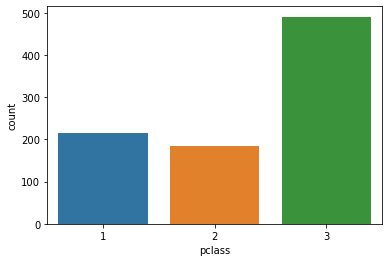

In [2]:
# pclass毎の生存者数を表示
sns.countplot(x='pclass', data=titanic_df)

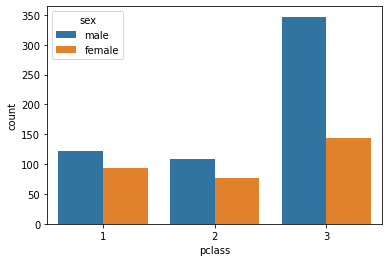

In [3]:
# pclass,sex毎の生存者数を表示
sns.countplot(x='pclass', hue='sex', data=titanic_df)

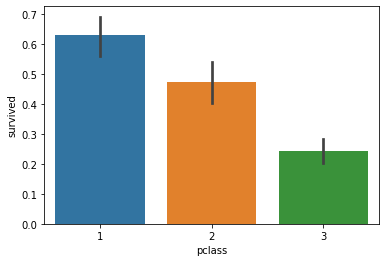

In [4]:
# pclass毎の生存率を表示
sns.barplot(x='pclass', y='survived', data=titanic_df)

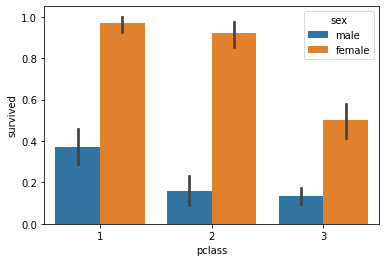

In [5]:
# pclass毎、性別毎の生存率を表示
sns.barplot(x='pclass', y='survived', hue='sex',data=titanic_df )

Text(0, 0.5, 'Survival Rate')

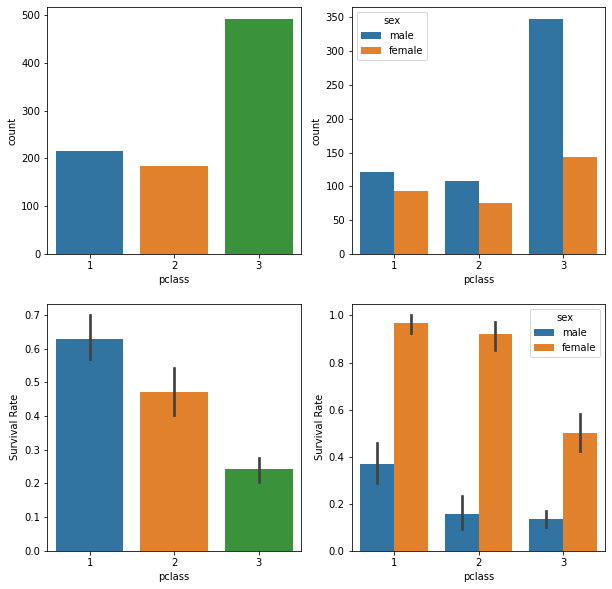

In [6]:
# 以上、4つのグラフを一度に表示
import matplotlib.pyplot as plt
# figure は 1 つ
plt.figure(figsize=(10, 10))

# 2行2列の1番目（左上）に描画
plt.subplot(2,2,1)
sns.countplot(x='pclass', data=titanic_df)

# 2行2列の2番目（右上）に描画
plt.subplot(2,2,2)
sns.countplot(x='pclass', hue='sex', data=titanic_df)

# 2行2列の3番目（左下）に描画
plt.subplot(2,2,3)
fig=sns.barplot(x='pclass', y='survived', data=titanic_df)
# Y軸のラベルを指定
fig.set_ylabel("Survival Rate")

# 2行2列の4番目（右下）に描画
plt.subplot(2,2,4)
fig2=sns.barplot(x='pclass', y='survived', hue='sex',data=titanic_df )
# Y軸のラベルを指定
fig2.set_ylabel("Survival Rate")


In [7]:
# グラフ毎に名前をつける


In [8]:
# Person列を作る。"mele","female","child"の3要素。
# Age列で15以下だったらsex列の値を代入、それ以外は、"child"。
def make_person_column(passenger):
    # 引数passengerはtitanic_dfのage,sex列
    sex, age=passenger
    if age >= 15:
        passenger=sex
    else:
        passenger = 'child'
    return passenger


In [76]:
# titanic_dfのsex列、age列を取り出し、make_person_column関数に渡し、できた列をtitanic_df列に結合する
titanic_df['person']=titanic_df[['sex','age']].apply(make_person_column, axis=1)
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,person,companion
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,male,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,female,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,male,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,male,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,female,0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,child,1
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,male,0


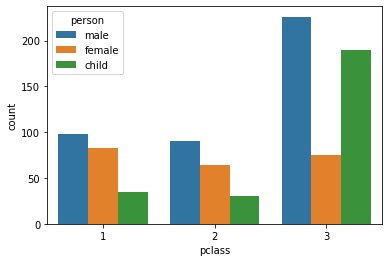

In [10]:
# 男女子ども別に乗客数を表示
sns.countplot(x="pclass", hue="person",data=titanic_df)

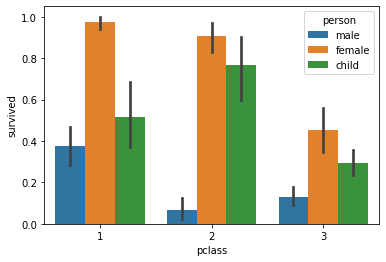

In [11]:
# 男女子ども別に生存率を表示
sns.barplot(x="pclass", hue="person", y="survived", data=titanic_df)

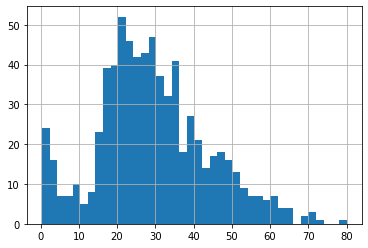

In [12]:
# bins引数で棒グラフの数を設定して表示
# 年齢層別生存率
titanic_df['age'].hist(bins = 40)

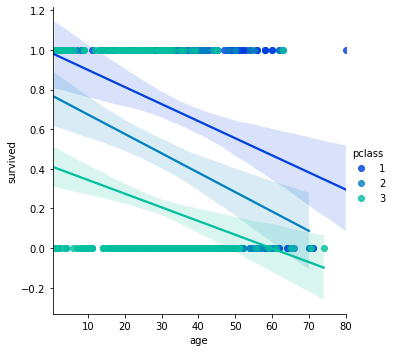

In [15]:
# 年齢と客席ごとに生存率を予測する
sns.lmplot(x="age", y="survived", hue="pclass", data=titanic_df, palette="winter")

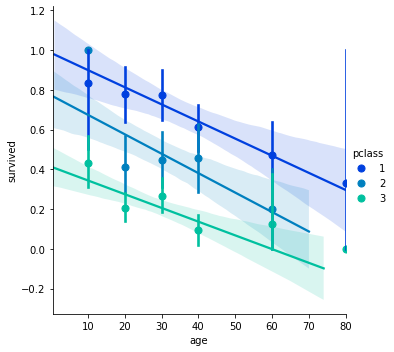

In [16]:
# 年代ごとに生存分布を見る。
generations = [10,20,30,40,60,80]
sns.lmplot(x="age", y="survived", hue="pclass", data=titanic_df, x_bins=generations, palette="winter")

C:\Users\atsushi\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


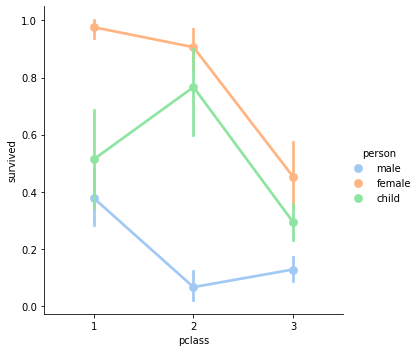

In [80]:
# 性別、子どもごと別に客席ごとの生存率を表示　
sns.factorplot(x='pclass',y='survived', hue='person', data=titanic_df, palette='pastel')

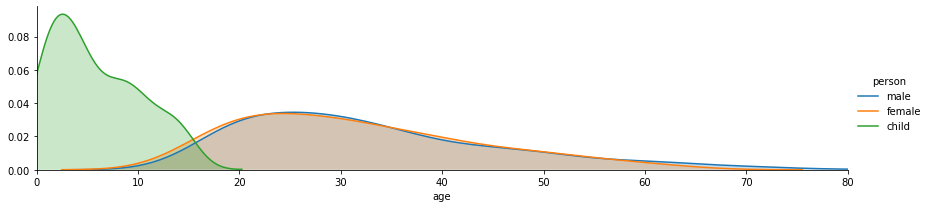

In [19]:
#SeabornのFaceGgridを使って可視化する。複数のカーネル密度推定のグラフを一つにまとめる。 
# person列で区切る。
fig = sns.FacetGrid(titanic_df,hue="person",aspect=4)
fig.map(sns.kdeplot,"age",shade=True)
#ｘ軸を０から、最高年齢とする。
oldset = titanic_df["age"].max()
fig.set(xlim=(0,oldset))
# グラフを描写する。
fig.add_legend()

In [71]:
# 同伴者がいるといないかで生存率に差はあるか
# 同伴者がいるかどうかの列を作成する。
def make_companion_column(titanic):
    sibsp = titanic['sibsp']
    parch = titanic['parch']
    titanic = 0
    if sibsp > 0:
        titanic = 1
    elif parch > 0:
        titanic = 1
    return titanic
# sibsp列とparch列を引数で与えて、make_companion_column関数を適用し、その結果で新しくcompanion列を作成    
titanic_df["companion"]=titanic_df.apply(make_companion_column,axis=1)

In [72]:
titanic_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,person,companion
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,male,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,female,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,female,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,female,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,male,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,male,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,female,0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,child,1
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,male,0


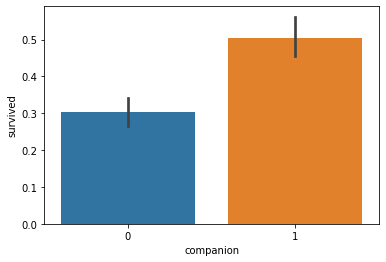

In [74]:
# 生存率を同伴者がいるかいないかで棒グラフ表示
sns.barplot(x="companion",y="survived", data=titanic_df)